## Using Latent Dirichlet Allocation as Feature Extraction for Tweet Classification

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("dataset/tweet.txt")
data

,tweet
0,brain fluid buildup delay giffords rehab
1,trailer talk week movie rite mechanic week opp...
2,rnc appoints chairman tampa convention effort ...
3,gbagbo camp futile cut ivory coast economy
4,chinese president lost translation powerful le...
...,...
2467,live moscow airport explosion
2468,supreme court refuse reinstate circuit global ...
2469,yemeni protester urged president ali abdullah ...
2470,indian navy coast guard rescue thai vessel pir...


In [3]:
label = pd.read_csv("dataset/tweet_label.txt")

In [4]:
from gensim import matutils, models
import scipy.sparse

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data.tweet)
data_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
data_bow

,aacons,aaron,aaup,aba,abby,abc,abdallah,abdullah,abel,absence,...,yr,yu,yuck,yum,yummy,zebco,zieralski,zone,zooey,zwak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
tdm = data_bow.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471
aacons,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaup,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abby,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np

#### Topic 100 - 150 dengan alpha 50/n_topic

In [10]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
lda1 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=110, passes=100,iterations=5000,alpha=[50/110]*110)
lda2 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=130, passes=100,iterations=5000,alpha=[50/130]*130)
lda3 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=150, passes=100,iterations=5000,alpha=[50/150]*150)
lda4 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=100, passes=100,iterations=5000,alpha=[50/100]*100)

In [11]:
X_1 = lda1.get_document_topics(bow=corpus,minimum_probability=0,minimum_phi_value=0)
X_2 = lda2.get_document_topics(bow=corpus,minimum_probability=0,minimum_phi_value=0)
X_3 = lda3.get_document_topics(bow=corpus,minimum_probability=0,minimum_phi_value=0)
X_4 = lda4.get_document_topics(bow=corpus,minimum_probability=0,minimum_phi_value=0)

In [12]:
feature_1 = [x for x in X_1]
feature_2 = [x for x in X_2]
feature_3 = [x for x in X_3]
feature_4 = [x for x in X_4]

In [13]:
def convert_lot2lol(lol):
    list_of_list = []
    for x in lol:
        temp = []
        for y in x:
            temp.append(y[1])
        list_of_list.append(temp)
    return list_of_list

In [14]:
feature_1_ = convert_lot2lol(feature_1)
feature_2_ = convert_lot2lol(feature_2)
feature_3_ = convert_lot2lol(feature_3)
feature_4_ = convert_lot2lol(feature_4)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(feature_1_, label, test_size=0.33, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(feature_2_, label, test_size=0.33, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(feature_3_, label, test_size=0.33, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(feature_4_, label, test_size=0.33, random_state=42)

#### Klasifikasi menggunakan K-NN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
def classify_KNN(X_train,y_train,X_test,y_test):
    plot_knn = []
    for x in range(30):
        classifier = KNeighborsClassifier(n_neighbors=x+1)
        classifier.fit(X_train,y_train)
        label_predknn = classifier.predict(X_test)
        count = 0
        for x,label_pred in enumerate(label_predknn):
            if label_pred == y_test.values[x][0]:
                count = count + 1
        plot_knn.append(count/len(label_predknn))
    return plot_knn

In [19]:
plot_1 = classify_KNN(X_train_1, y_train_1,X_test_1, y_test_1)
plot_2 = classify_KNN(X_train_2, y_train_2,X_test_2, y_test_2)
plot_3 = classify_KNN(X_train_3, y_train_3,X_test_3, y_test_3)
plot_4 = classify_KNN(X_train_4, y_train_4,X_test_4, y_test_4)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

In [20]:
import matplotlib.pyplot as plt

In [21]:
len(plot_1)

30

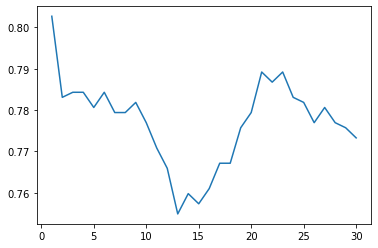

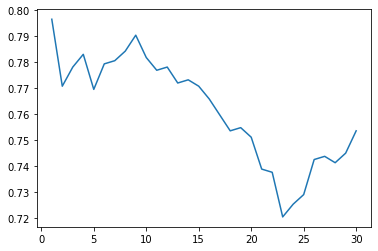

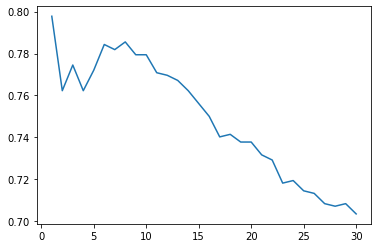

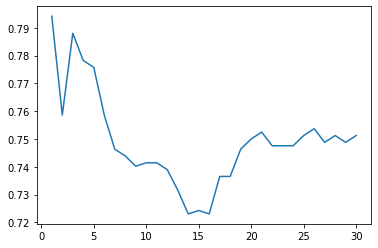

In [22]:
plt.plot(range(1,31),plot_1)
plt.show()
plt.plot(range(1,31),plot_2)
plt.show()
plt.plot(range(1,31),plot_3)
plt.show()
plt.plot(range(1,31),plot_4)
plt.show()

### Conclusions

feature extraction menggunakan LDA, dan Klasifikasi menggunakan K-NN menghasilkan akurasi sebesar 80%